### Transformata Hougha w przestrzeni ab - Domowe
Przestrzeń ρ,θ nie jest jedyną przestrzenią w której punkt odpowiada parametrom prostej. Np. można spróbować wykorzystać tradycyjne równanie prostej:

y=ax+b

W tej przestrzeni reprezentacją pęku prostych jest prosta. 

Zadanie: napisać funkcję, która jako argument przyjmuje obraz (binarny) oraz parametry:

- aMin - minimalna wartość parametru a
- aMax - maksymalna  wartość parametru a
- aSkok - skok parametru a
- bMin - minimalna wartość parametru b
- bMax  - maksymalna  wartość parametru b
- bSkok - skok parametru b
Jako wynik ma zwrócić macierz przestrzeni Hougha ab.

Uwagi:

- zadanie może wyglądać na skomplikowane ale tak naprawdę wymaga tylko starannego przemyślenia
- najważniejszy jest problem "adresowania" macierzy H. Można do tego wykorzystać dwa wektory A i B ze wszystkimi możliwymi wartościami jakie parametry a i b mogę przyjąć (w podanych zakresach z podanym skokiem). Wówczas indeksy tych wektorów będą współrzędnymi w macierzy H. Do stworzenia wektorów wykorzystaj funkcję _np.arange_
- na podstawie rozmiaru wektorów A i B (własność _shape_) należy stworzyć wyzerowaną macierz H (funkcja _np.zeros_) 
- dla każdego punktu krawędzi na obrazie należy:
    - używająć wektora A dla każdej z jego wartości a obliczyć odpowiednią wartość b - indeksy kolejnych wartości a (a_idx) będą jedną z współrzędnych macierzy H, natomiast drugą współrędną mozna uzyskać jako b_idx = np.argmin(abs(B - b)).
        - każde a_idx i b_idx wyznaczą punkt w macierzy H, który należy zinkrementować
- działanie funkcji należy przetestować na punktach generowanych w 'edytorku' z punktu "Transformacja Hougha dla małej liczby punktów". Proponowane parametry funkcji:
    - aMin: -5
    - aMax:  5
    - aSkok: 0.05 
    - bMin: -100
    - bMax:  100
    - bSkok: 1

Zastanów się w przypadku jakich prostych reprezentacja ab nie sprawdzi się.

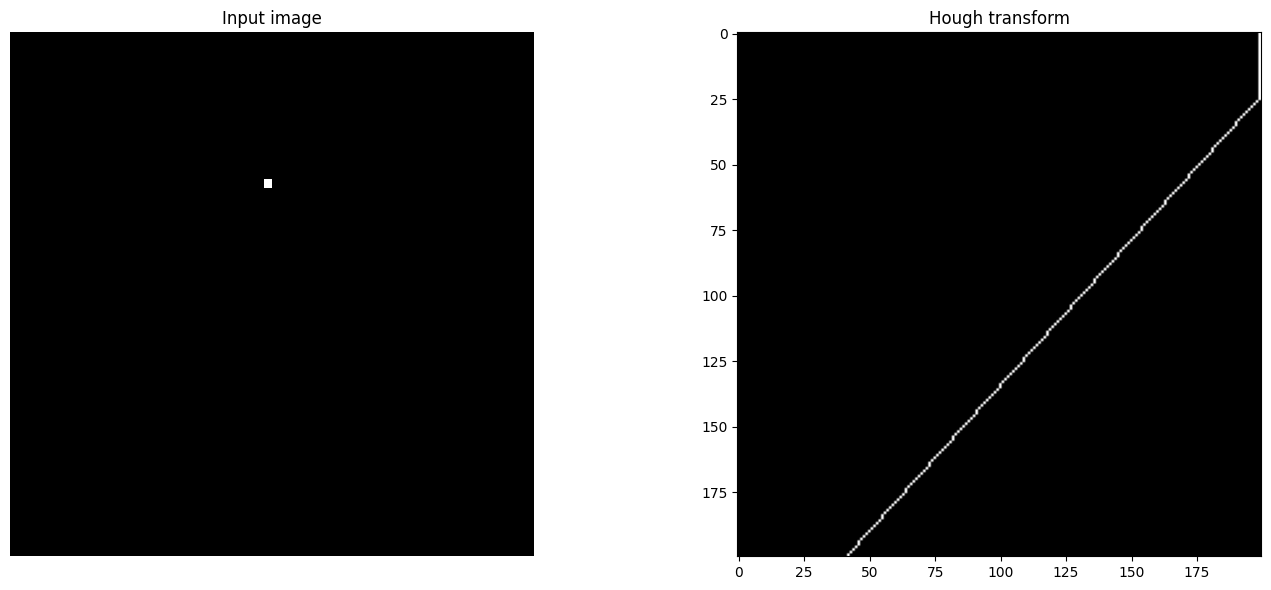

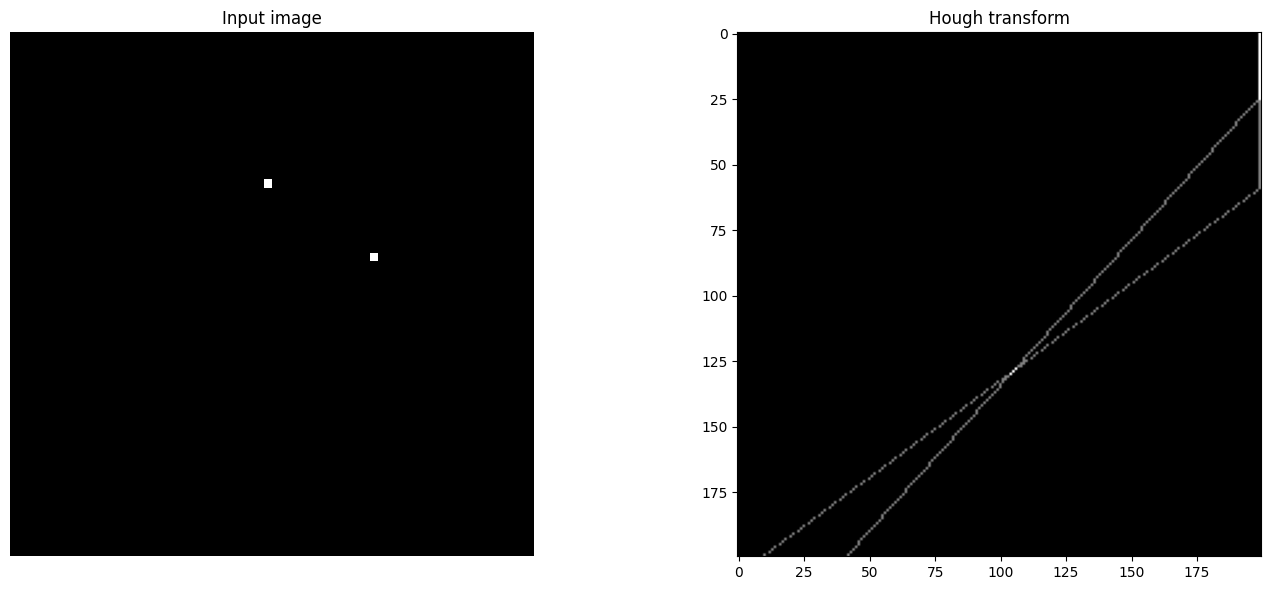

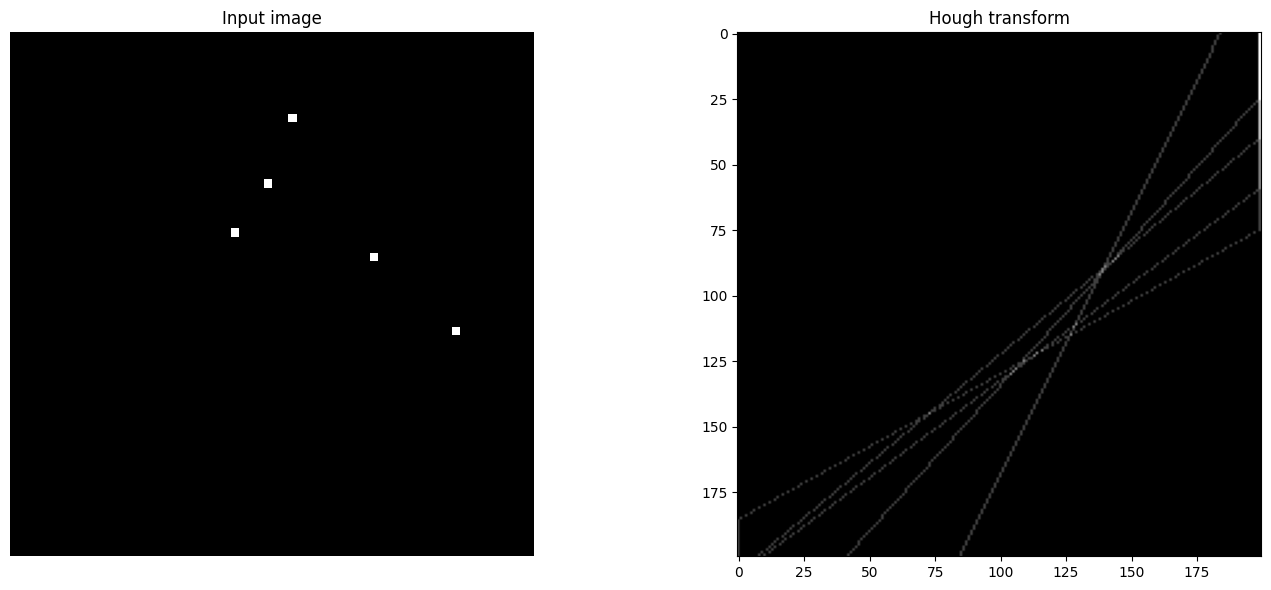

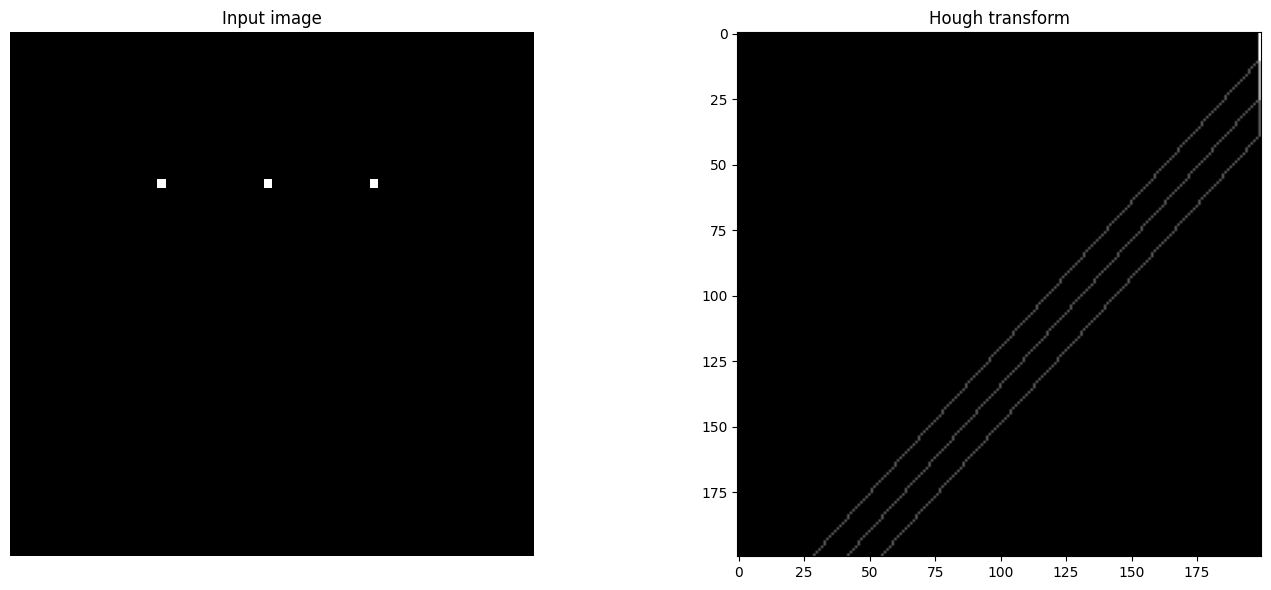

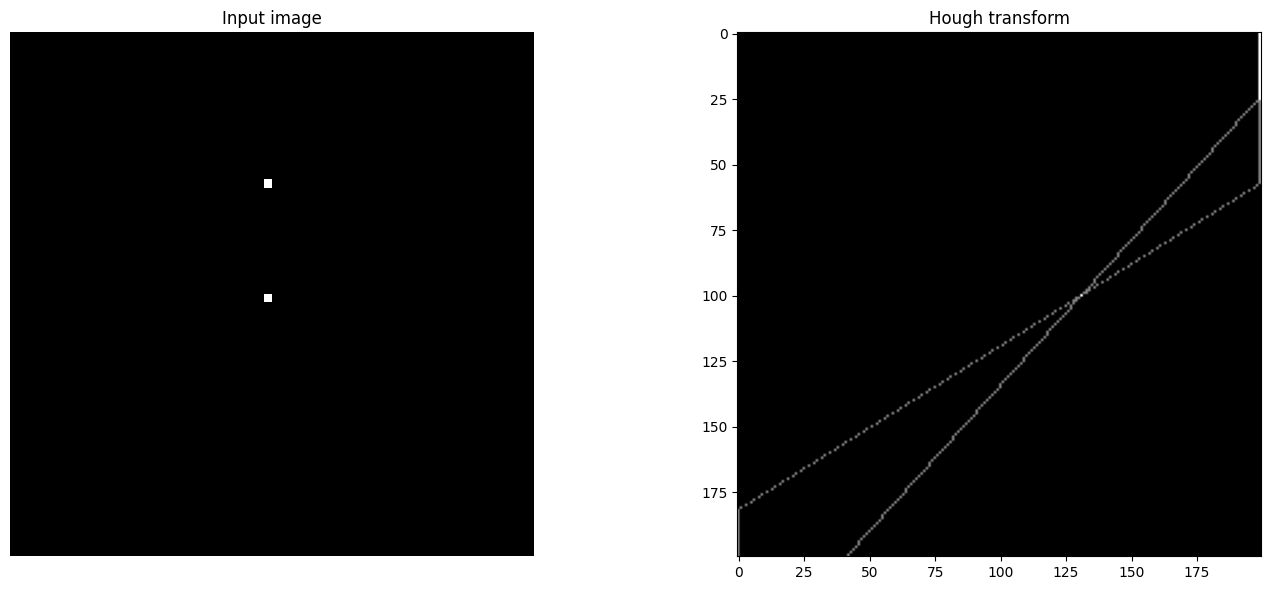

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from skimage.transform import hough_line, hough_line_peaks


def show_hough(h, image):
    # Generating figure 1
    fig, ax = plt.subplots(1, 2, figsize=(15, 6))

    ax[0].imshow(image, 'gray')
    ax[0].set_title('Input image')
    ax[0].set_axis_off()

    ax[1].imshow(h, 'gray')
    ax[1].set_title('Hough transform')
    
    plt.tight_layout()
    plt.show()


def hough_ab(image,aMin,aMax,aSkok,bMin,bMax,bSkok):
    A = np.arange(aMin,aMax,aSkok)
    B = np.arange(bMin,bMax,bSkok)
    H = np.zeros((len(A),len(B)))
    for x in range(image.shape[1]):
        for y in range(image.shape[0]):
            if image[x,y] == 1:
                for idx_a,a in enumerate(A):
                    b = y-a*x
                    idx_b = np.argmin(abs(B-b))
                    H[idx_a,idx_b] += 1
    return H


im = np.zeros((64,64), dtype=np.uint8)
im[18, 31] = 1
H = hough_ab(im,-5,5,0.05,-100,100,1)
show_hough(H,im)

im[27,44] = 1
H = hough_ab(im,-5,5,0.05,-100,100,1)
show_hough(H,im)

im[36,54] = 1
im[10,34] = 1
im[24,27] = 1
H = hough_ab(im,-5,5,0.05,-100,100,1)
show_hough(H,im)

im = np.zeros((64,64), dtype=np.uint8)
im[18, 31] = 1
im[18, 44] = 1
im[18, 18] = 1
H = hough_ab(im,-5,5,0.05,-100,100,1)
show_hough(H,im)

im = np.zeros((64,64), dtype=np.uint8)
im[18, 31] = 1
im[32, 31] = 1
H = hough_ab(im,-5,5,0.05,-100,100,1)
show_hough(H,im)

Algorytm ma problem z wykryciem lini poziomych. Wówczas linie dla takich punktów w przestrzeni Hougha są równoległe. 